In [1]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

In [2]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

In [3]:
tickers = []

for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

In [4]:
tickers = [s.replace('\n', '') for s in tickers]

In [55]:
start = datetime.date.today() - datetime.timedelta(days=365)
end = datetime.date.today()
data = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No data found for this date range, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [56]:
df = data.stack().reset_index().rename(index=str, columns={"level_1": "Symbol"}).sort_values(['Symbol','Date'])

In [57]:
import seaborn as sns
import numpy as np

In [58]:
X = np.array(df.groupby(['Symbol'])['Volume'].mean().reset_index().sort_values(by='Volume', ascending = False)[:10]['Symbol'])
X

array(['TSLA', 'AAPL', 'AMD', 'AMZN', 'F', 'NVDA', 'CCL', 'BAC', 'INTC',
       'T'], dtype=object)

In [59]:
df2 = df.groupby(['Date', 'Symbol'])['Close'].mean().reset_index()

In [60]:
df3 = df2[df2['Symbol'].isin(X)]
df3

,Date,Symbol,Close
3,2022-04-13,AAPL,170.399994
29,2022-04-13,AMD,97.739998
34,2022-04-13,AMZN,155.541000
53,2022-04-13,BAC,38.820000
82,2022-04-13,CCL,19.510000
...,...,...,...
124754,2023-04-12,F,12.670000
124818,2023-04-12,INTC,32.020000
124918,2023-04-12,NVDA,264.950012
125007,2023-04-12,T,19.770000


In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 3 to 125026
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2500 non-null   datetime64[ns]
 1   Symbol  2500 non-null   object        
 2   Close   2500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 78.1+ KB


IndexError: index -1 is out of bounds for axis 0 with size 0

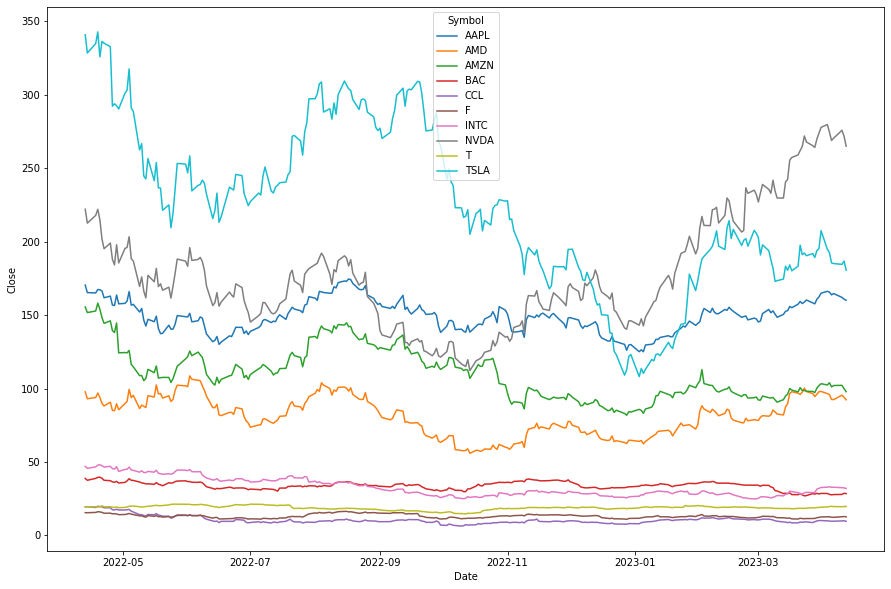

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
sns.lineplot(x = 'Date', y = 'Close', hue = 'Symbol', data = df3)

i = 1
for line in plt.gca().lines:
    if i > 10:
        label = line.get_label()
        #print(label)
        plt.text(line.get_xdata()[-1] + 0.5, line.get_ydata()[-1], label, ha='left', va='center', fontsize=10)
    i = i + 1



# for line in plt.gca().lines:
#     label = line.get_label()
#     #print(label)
#     plt.text(line.get_xdata()[0] + 0.5, line.get_ydata()[0], label, ha='left', va='center', fontsize=10)


# show the plot
plt.show()